In [1]:
import os
import sys

import matplotlib.pyplot as plt
from hydra import initialize, compose
from pyHalo.preset_models import CDM
from glob import glob
import pickle
import numpy as np

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses import lens_util
from mejiro.plots import plot, overplot
from mejiro.utils import util
from mejiro.helpers import color

In [2]:
side = 10

In [3]:
lens_dir = os.path.join('/data', 'bwedig', 'roman-population', 'data', 'lenses')
lens_paths = glob(lens_dir + '/*')
lens_list = [lens_util.unpickle_lens(i, band='f106', uid=None) for i in lens_paths[:side ** 2]]
array_list = [i.get_array(num_pix=97, side=10.67) for i in lens_list]

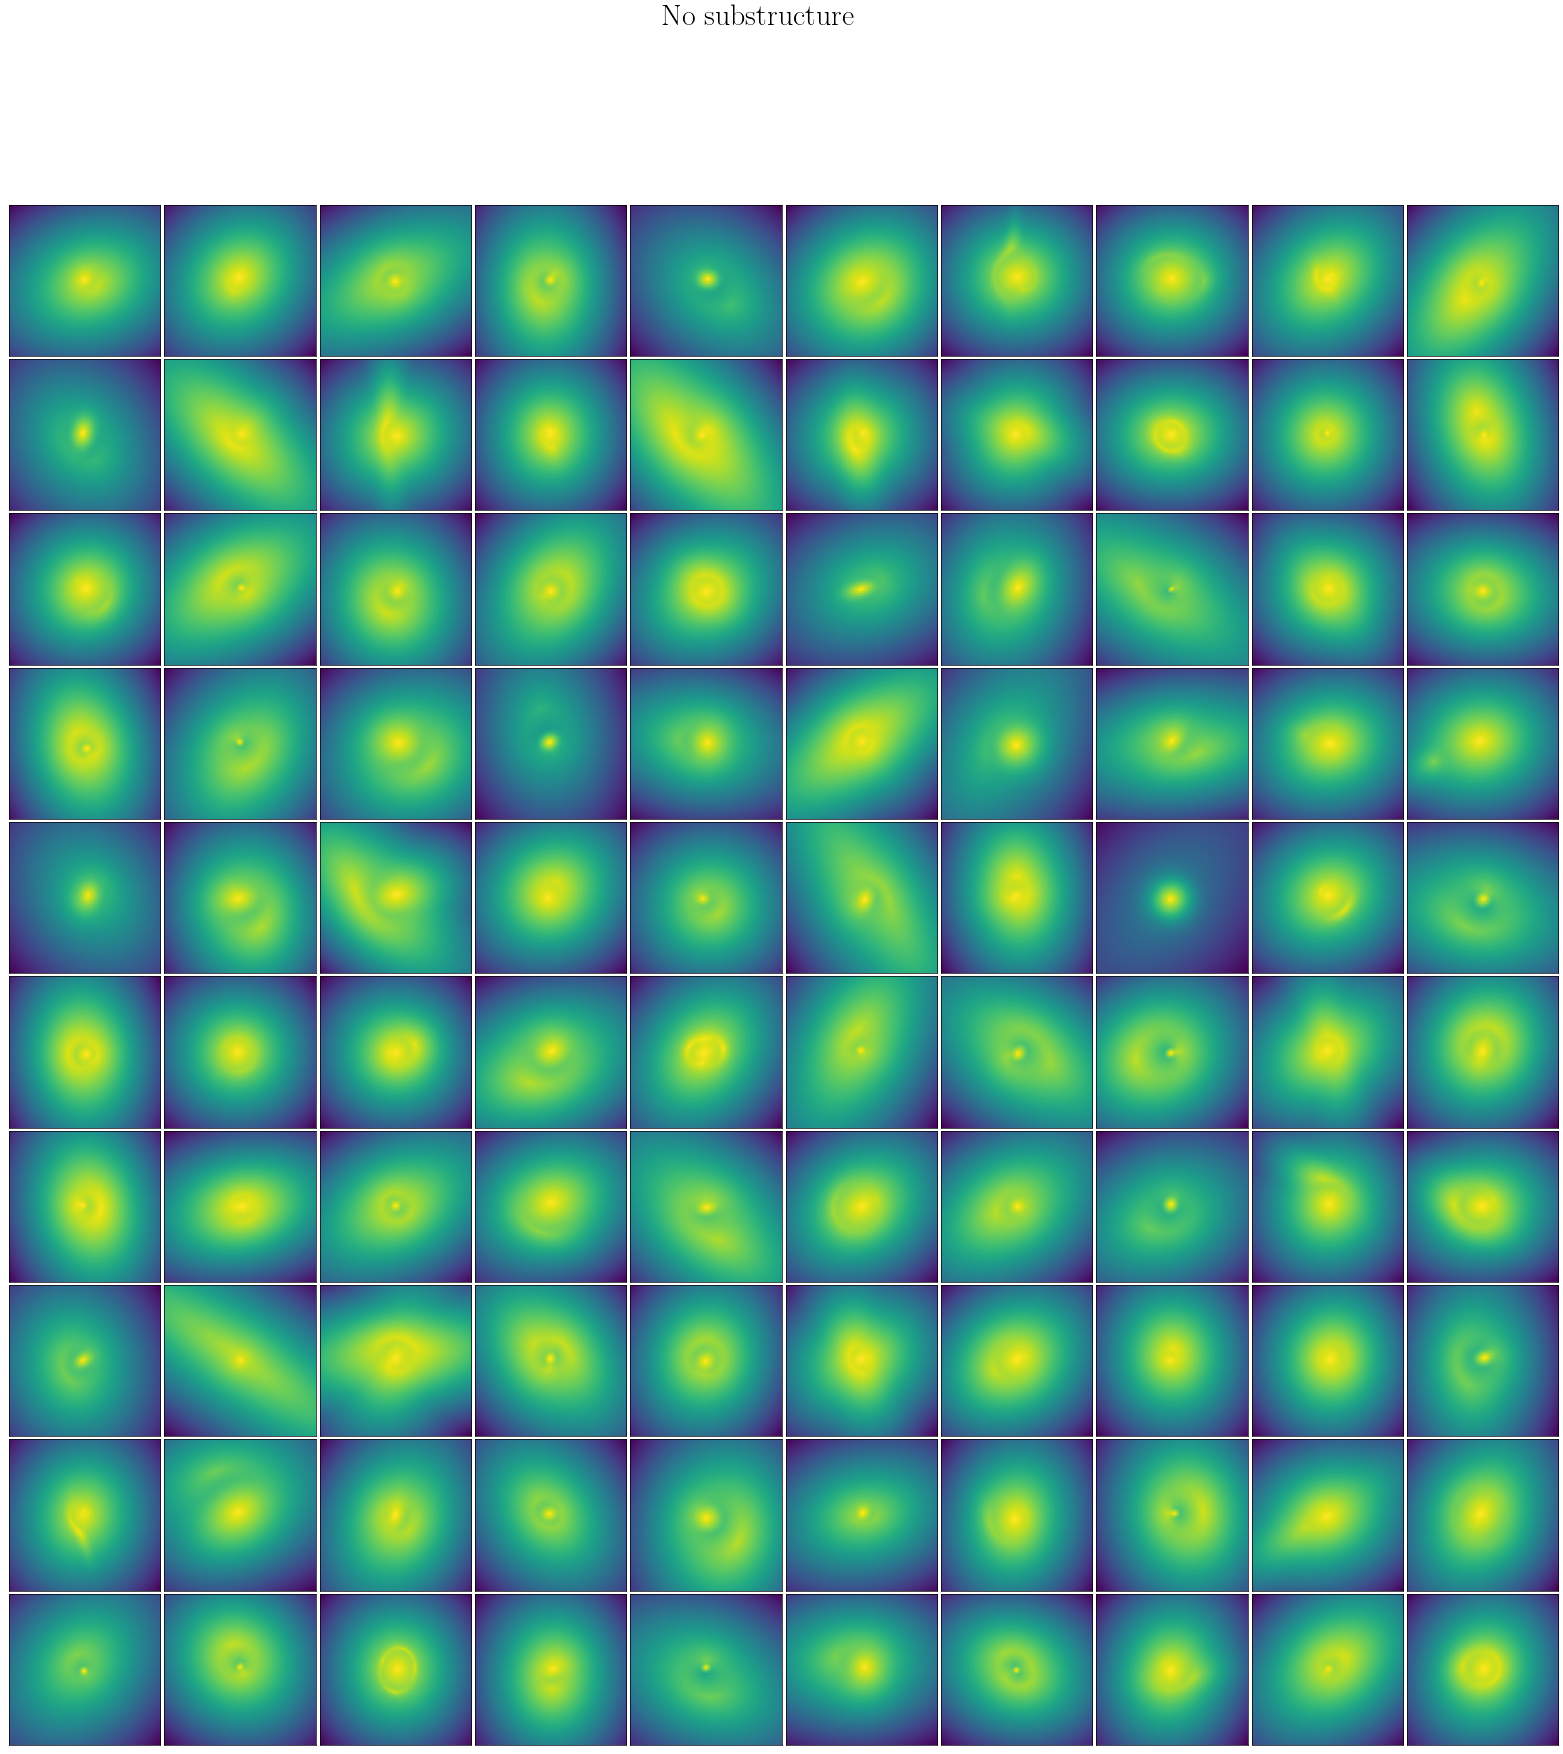

In [4]:
plot.plot_grid(array_list, side=side, log10=True, title='No substructure')

In [5]:
# unpickle lens dict list
dict_list = util.unpickle_all(os.path.join(pickle_dir, '03_models_and_updated_lenses'), limit=side ** 2)
model_list = [i['model'] for i in dict_list]
lens_list = [i['lens'] for i in dict_list]

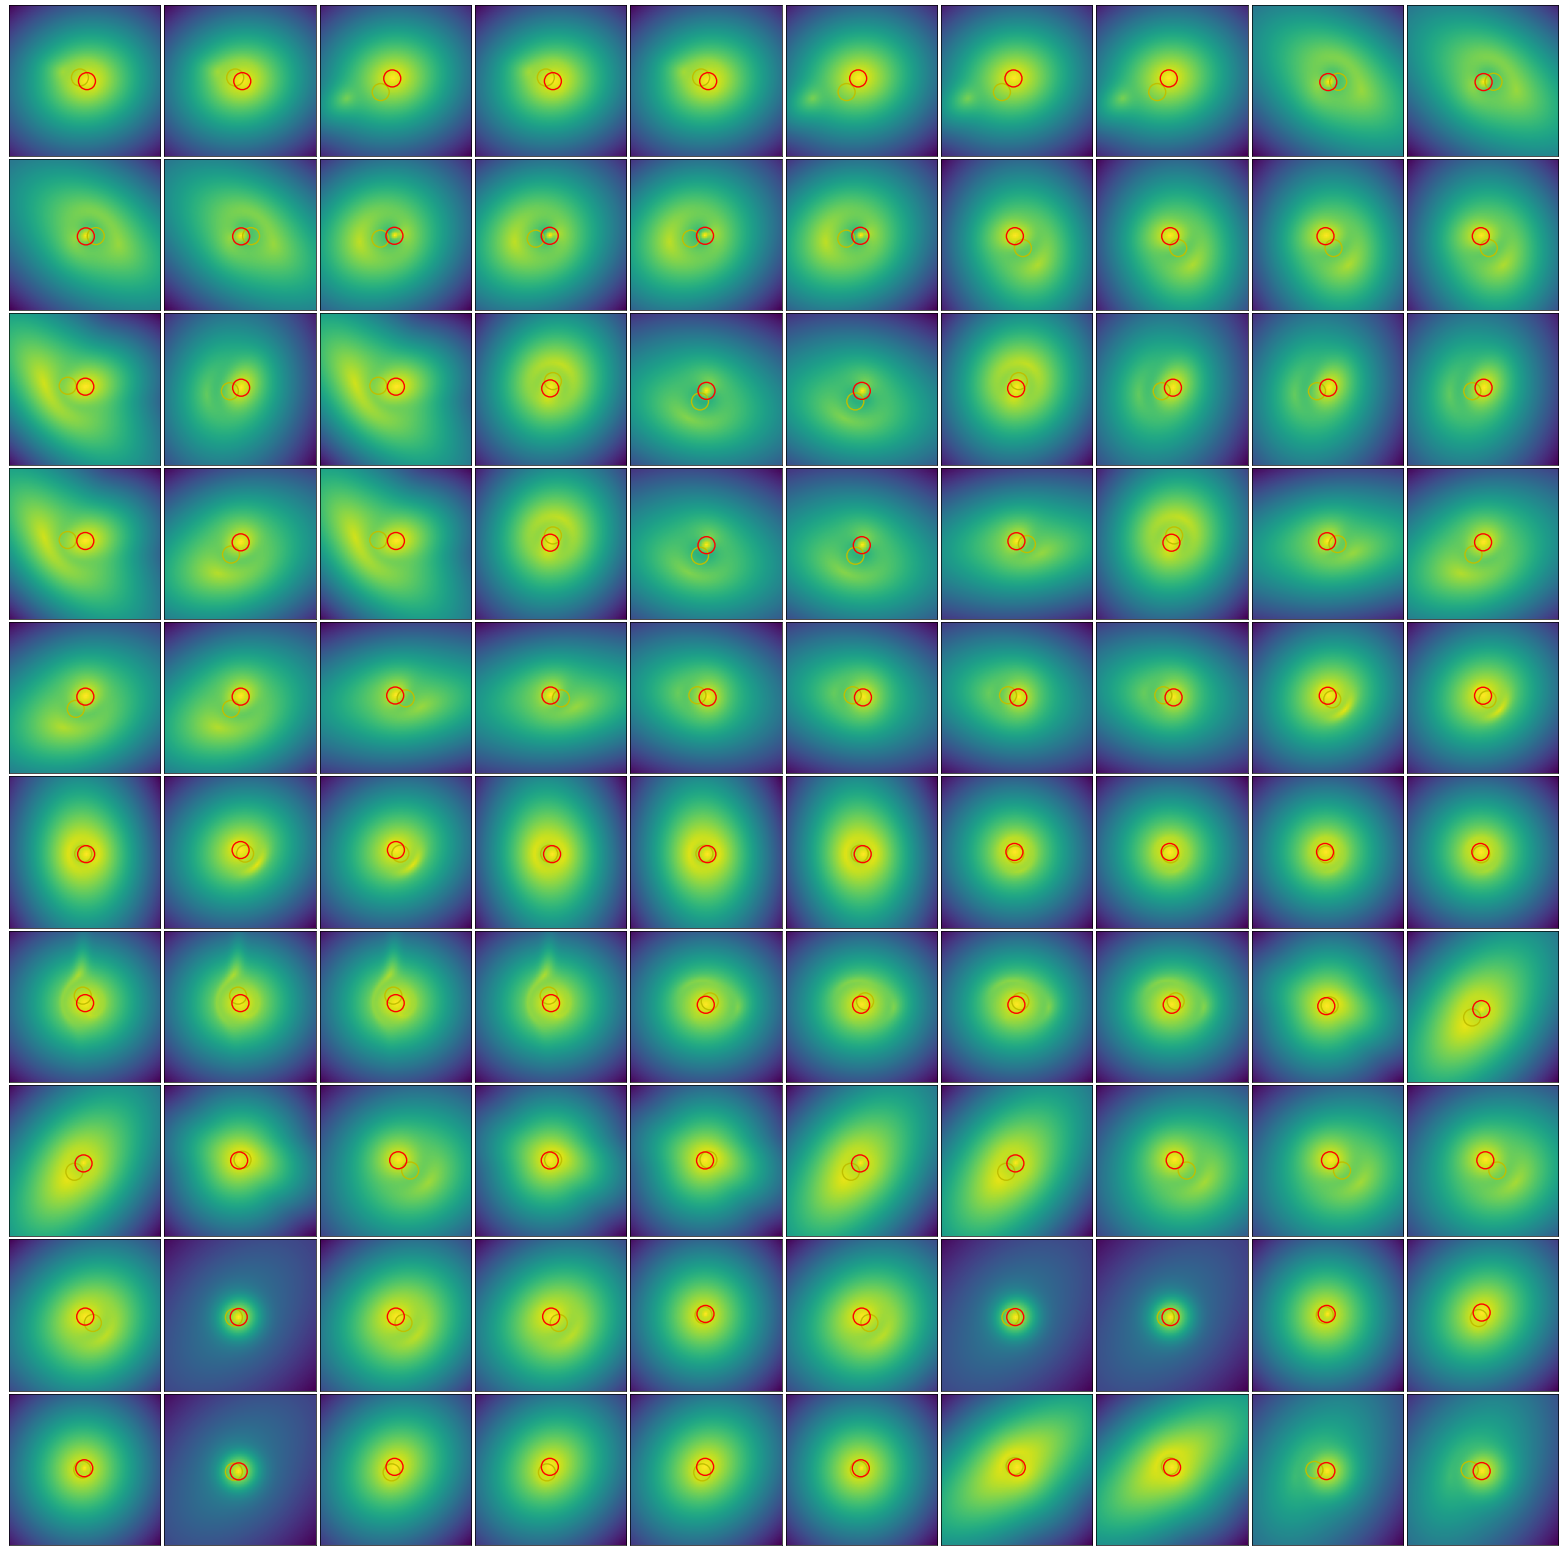

In [6]:
f, ax = plt.subplots(nrows=side, ncols=side, figsize=(20, 20), gridspec_kw={'hspace': 0.02, 'wspace': 0.02})

for i, image in enumerate(model_list):
    image = np.log10(image)
    ax[i // side, i % side].imshow(image)
    overplot.source_position(ax[i // side, i % side], lens_list[i])
    overplot.lens_position(ax[i // side, i % side], lens_list[i])
    ax[i // side, i % side].get_xaxis().set_visible(False)
    ax[i // side, i % side].get_yaxis().set_visible(False)

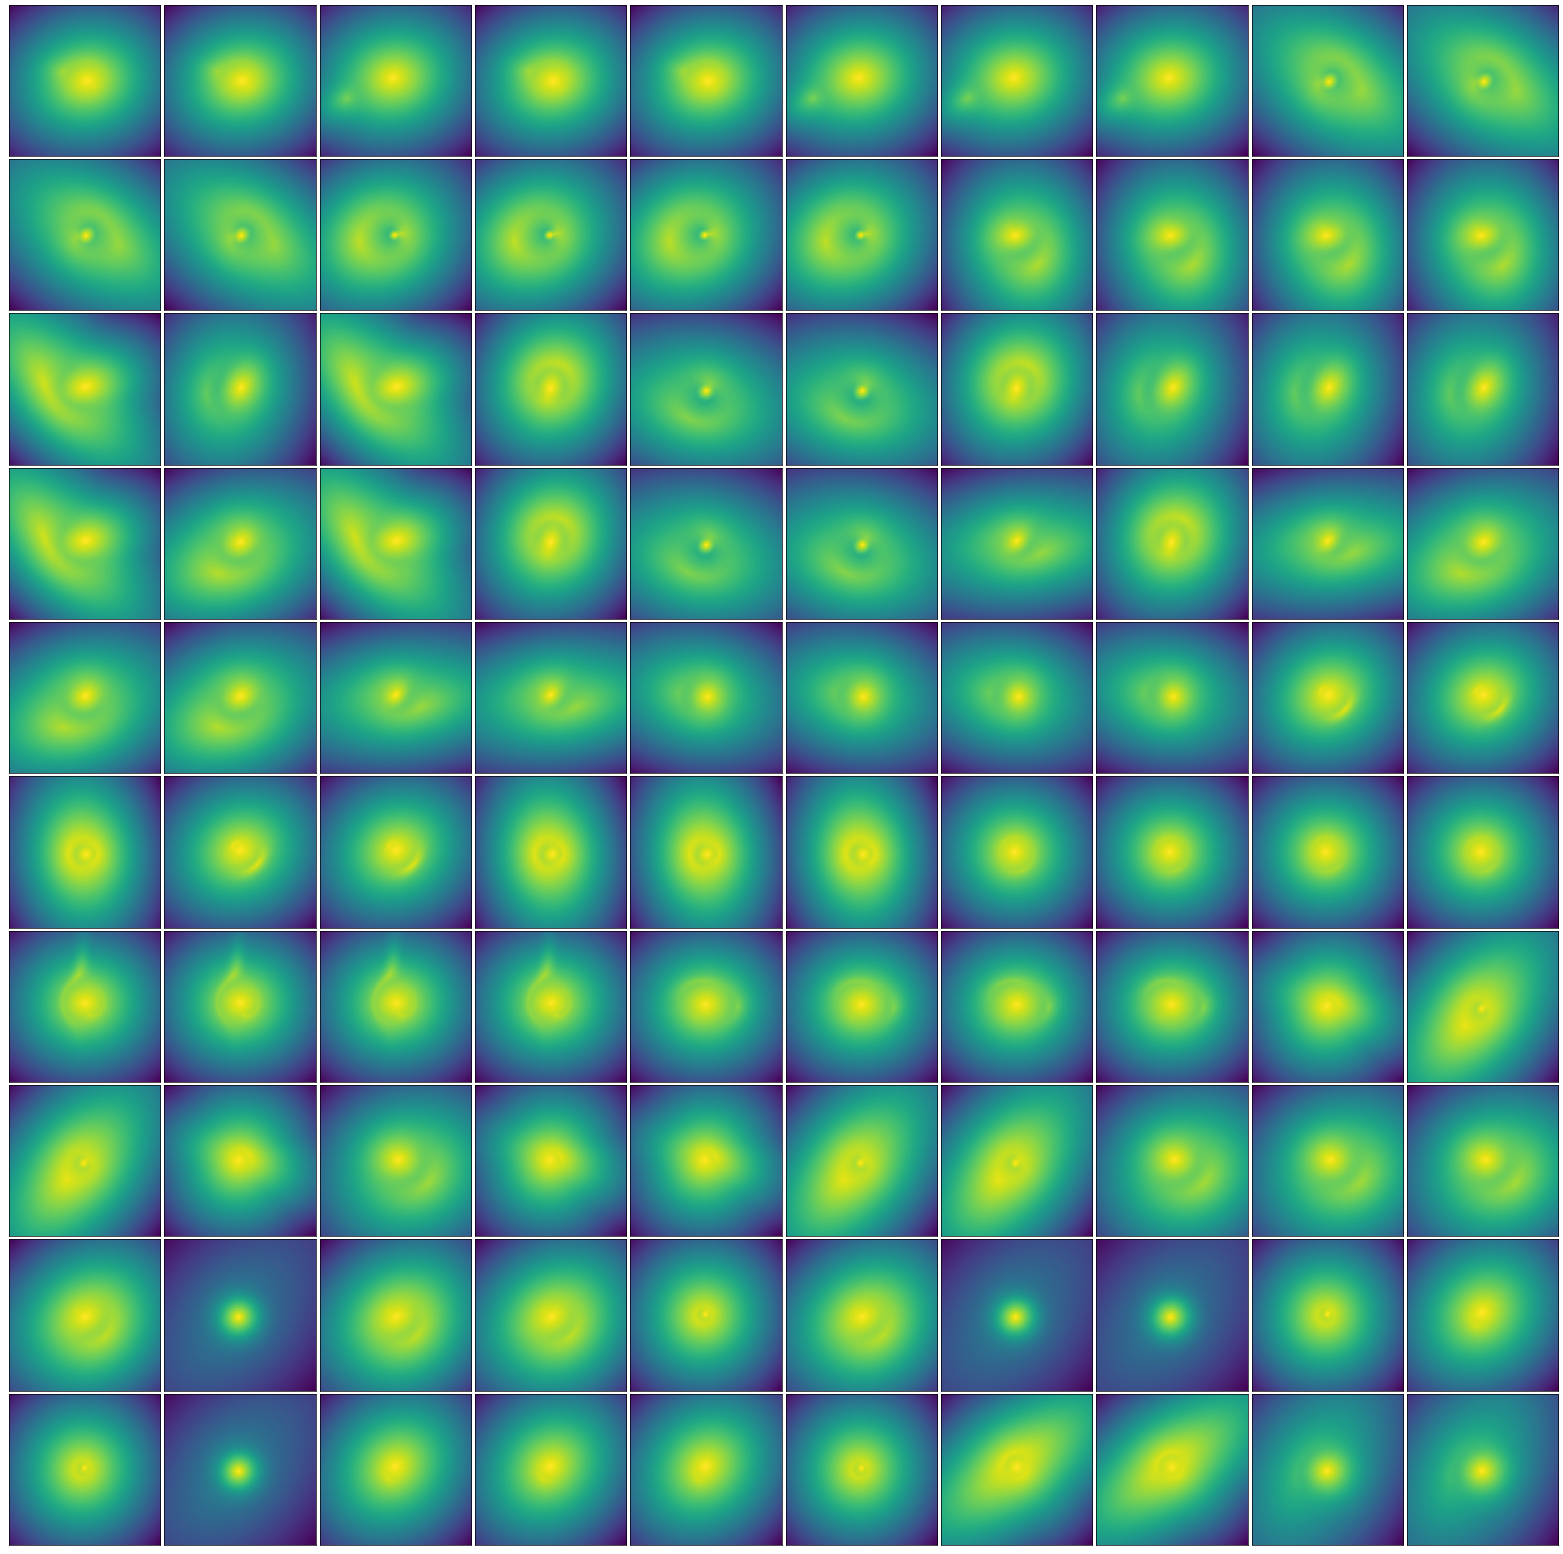

In [7]:
save_path = os.path.join(figure_dir, 'mosaic_models.png')
plot.plot_grid(model_list, side=side, log10=True, save=save_path)

In [8]:
pandeia_dir = os.path.join(array_dir, '04_pandeia_output_color')
pandeia_files = glob(pandeia_dir + '/pandeia_*')[:side ** 2]
pandeia_images = [np.load(i) for i in pandeia_files]

In [9]:
print(pandeia_files)

['/data/bwedig/roman-pandeia/output/arrays/04_pandeia_output_color/pandeia_00000050_f106.npy', '/data/bwedig/roman-pandeia/output/arrays/04_pandeia_output_color/pandeia_00000050_f158.npy', '/data/bwedig/roman-pandeia/output/arrays/04_pandeia_output_color/pandeia_00000050_f184.npy', '/data/bwedig/roman-pandeia/output/arrays/04_pandeia_output_color/pandeia_00000050_f129.npy', '/data/bwedig/roman-pandeia/output/arrays/04_pandeia_output_color/pandeia_00000048_f106.npy', '/data/bwedig/roman-pandeia/output/arrays/04_pandeia_output_color/pandeia_00000048_f184.npy', '/data/bwedig/roman-pandeia/output/arrays/04_pandeia_output_color/pandeia_00000048_f129.npy', '/data/bwedig/roman-pandeia/output/arrays/04_pandeia_output_color/pandeia_00000048_f158.npy', '/data/bwedig/roman-pandeia/output/arrays/04_pandeia_output_color/pandeia_00000059_f184.npy', '/data/bwedig/roman-pandeia/output/arrays/04_pandeia_output_color/pandeia_00000059_f106.npy', '/data/bwedig/roman-pandeia/output/arrays/04_pandeia_output

In [12]:
color_pandeia_images = []

for i in range(25):
    all_filters = glob(pandeia_dir + f'/pandeia_{str(i).zfill(8)}_*.npy')
    # print(all_filters)
    f106 = [np.load(i) for i in all_filters if 'f106' in i][0]
    f129 = [np.load(i) for i in all_filters if 'f129' in i][0]
    f158 = [np.load(i) for i in all_filters if 'f158' in i][0]
    f184 = [np.load(i) for i in all_filters if 'f184' in i][0]
    if f106.shape == (91, 91):
        color_image = color.get_rgb(image_b=f106, image_g=f129, image_r=f184, stretch=3, Q=5)
        # color_image = color.get_rgb_log10(image_b=f106, image_g=f129, image_r=f184)
        color_pandeia_images.append(color_image)

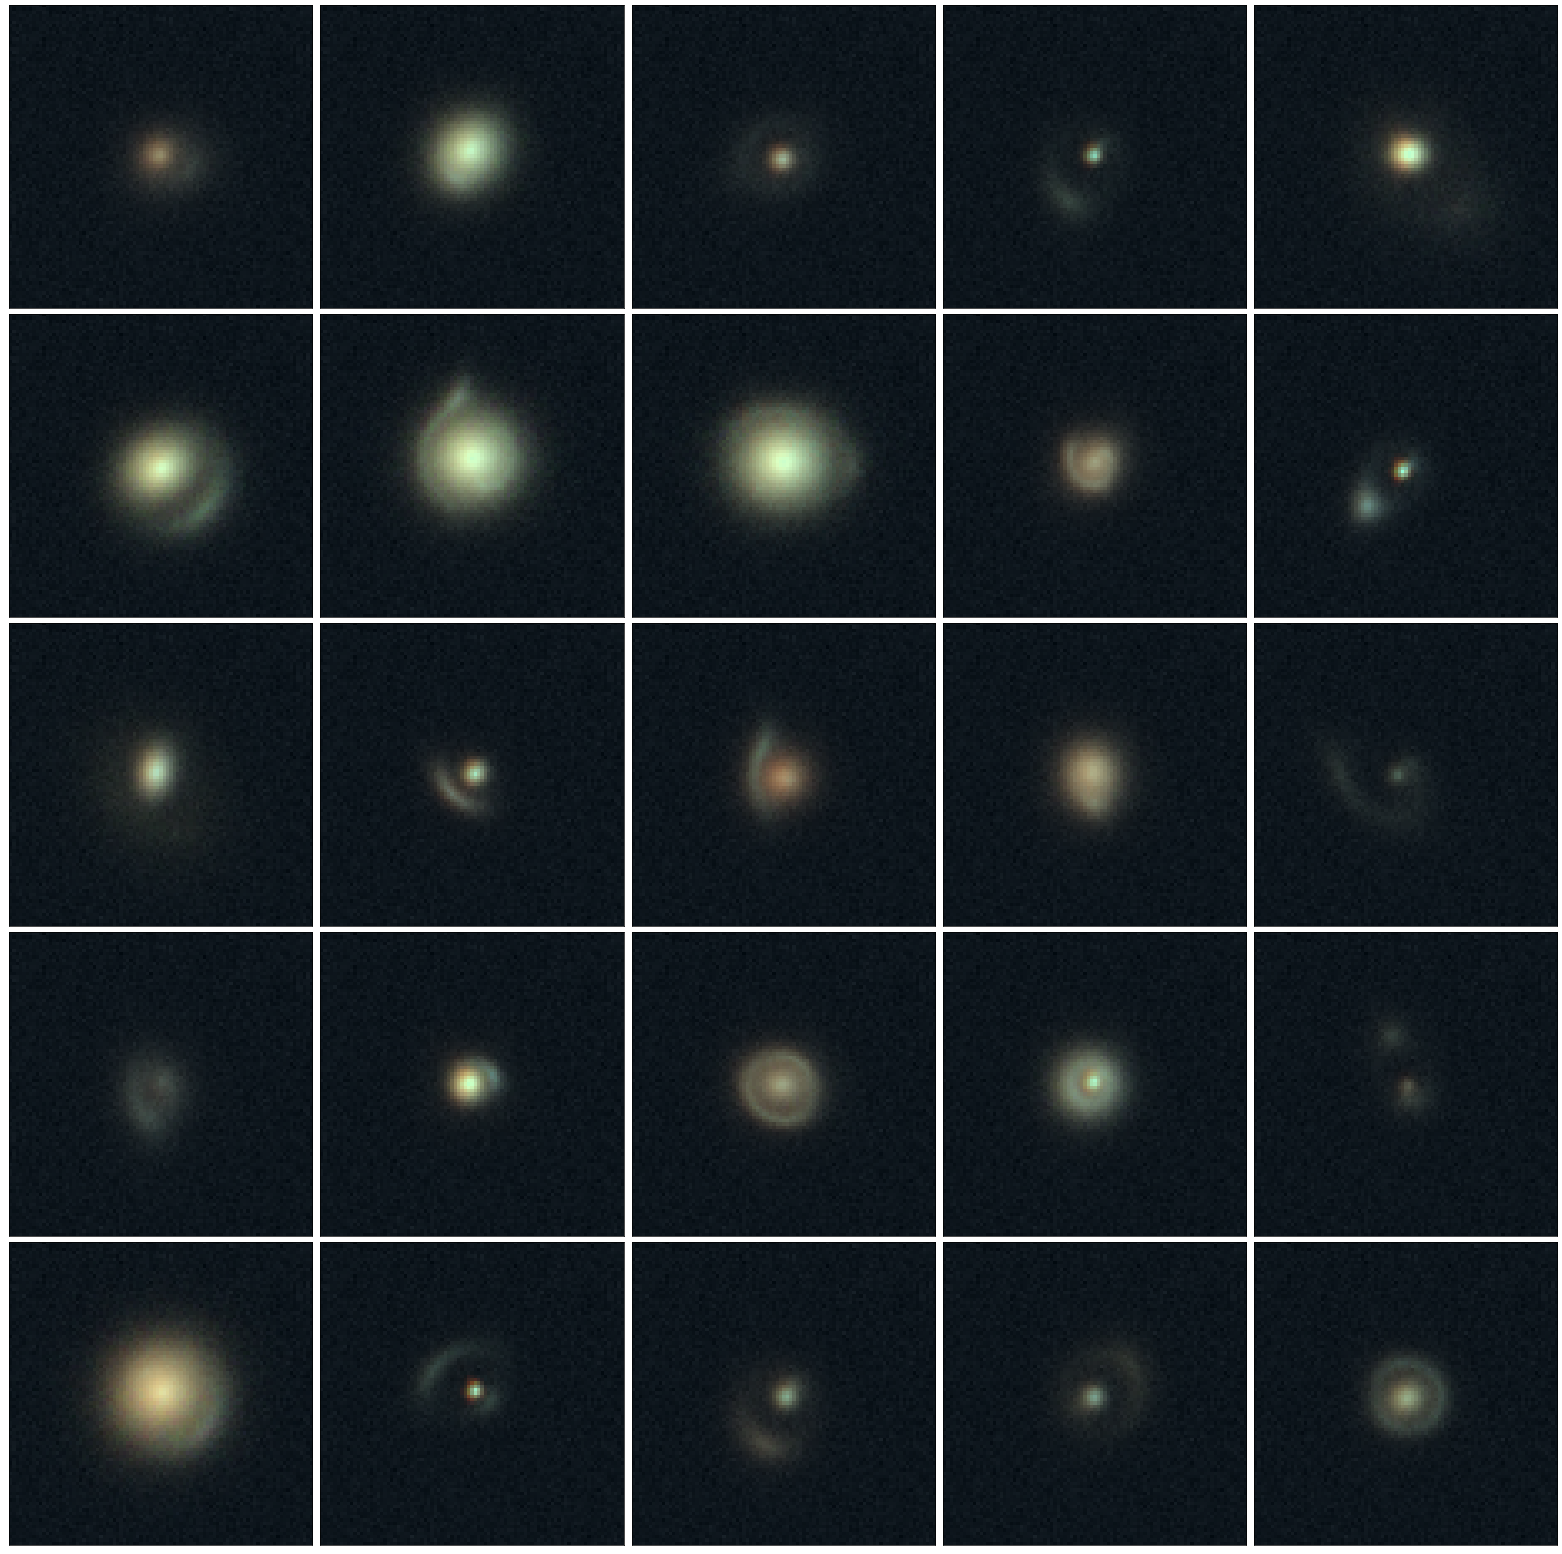

In [13]:
# save_path = os.path.join(figure_dir, 'mosaic_pandeia.png')
plot.plot_grid(color_pandeia_images, side=5, log10=False)  # save=save_path

In [12]:
# save_path = os.path.join(figure_dir, 'mosaic_pandeia_small.png')
plot.plot_grid(color_pandeia_images, side=5, log10=True)  # , save=save_path

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

ValueError: Unsupported dtype

<Figure size 2000x2000 with 25 Axes>

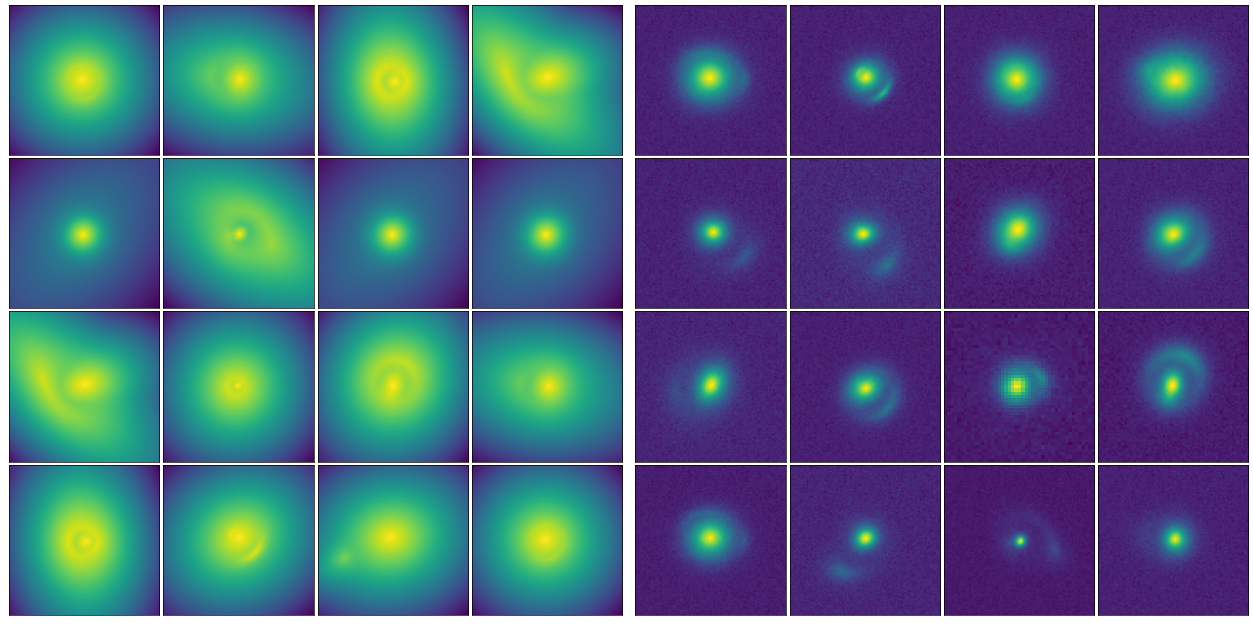

In [ ]:
fig = plt.figure(figsize=(16, 16))
outer_grid = fig.add_gridspec(2, 2, wspace=0.02, hspace=0.02)

grid = 4

import random
np.random.seed(config.seed)
random_indices = random.sample(range(len(pandeia_images)), grid ** 2)

model_subset = [model_list[i] for i in random_indices]
pandeia_subset = [pandeia_images[i] for i in random_indices]

subsets = [model_subset, pandeia_subset]

for i, subset in enumerate(subsets):
    inner_grid = outer_grid[0, i].subgridspec(4, 4, wspace=0.02, hspace=0.02)
    ax = inner_grid.subplots()
    for i, image in enumerate(subset):
        ax[i // grid, i % grid].imshow(np.log10(image), cmap='viridis')
        ax[i // grid, i % grid].get_xaxis().set_visible(False)
        ax[i // grid, i % grid].get_yaxis().set_visible(False)

plt.savefig(os.path.join(figure_dir, 'mosaic.png'))
plt.show()